In [1]:
!pip install mnist

In [16]:
!pip install onnxruntime

     |████████████████████████████████| 3.1MB 858kB/s eta 0:00:01


In [27]:
!pip install onnx

     |████████████████████████████████| 7.1MB 845kB/s eta 0:00:01     |███████████▋                    | 2.6MB 493kB/s eta 0:00:10


In [1]:
import mnist

In [2]:
mnist.temporary_dir = lambda : '/data/mnist-data'

In [5]:
[d for d in dir(mnist) if not d.startswith('_')]

['IdxDecodeError',
 'array',
 'datasets_url',
 'download_and_parse_mnist_file',
 'download_file',
 'functools',
 'gzip',
 'numpy',
 'operator',
 'os',
 'parse_idx',
 'struct',
 'tempfile',
 'temporary_dir',
 'test_images',
 'test_labels',
 'train_images',
 'train_labels',
 'urljoin',
 'urlretrieve']

In [3]:
test_images = mnist.test_images().tolist()

In [5]:
assert(len(test_images) == 10000)

In [6]:
import os, sys

In [12]:
os.listdir('/data/mnist-data')

['t10k-images-idx3-ubyte.gz']

In [7]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
type(test_images[0])

list

Looks like each image is parsed into a list of lists:

In [16]:
type(test_images[0][0])

list

In [17]:
len(test_images[0])

28

In [18]:
len(test_images[0][0])

28

In [21]:
test_mat = np.array(test_images[0])

In [22]:
test_mat.shape

(28, 28)

In [24]:
test_mat.dtype

dtype('int64')

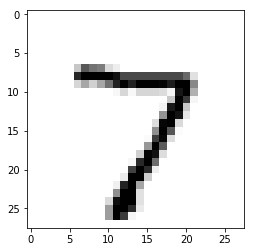

In [26]:
plt.imshow(test_mat, cmap='Greys')

In [10]:
def display_nth_image(i):
    plt.imshow(np.array(test_images[i]), cmap='Greys')

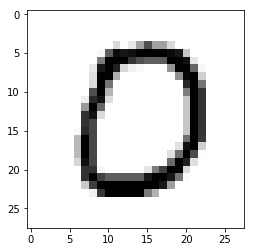

In [11]:
display_nth_image(10)

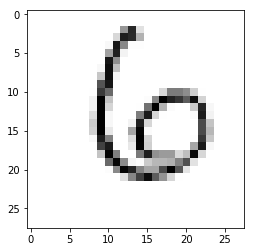

In [12]:
display_nth_image(100)

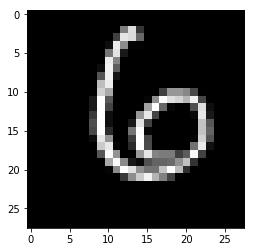

In [14]:
plt.imshow(np.array(test_images[100]), plt.get_cmap('gray'))

In [13]:
plt.imsave('img_0.png', np.array(test_images[0]), format = 'png', cmap = plt.get_cmap('gray'))

We need black digits on white background, so need a different colormap:

In [15]:
plt.imsave('img_0.png', np.array(test_images[0]), format = 'png', cmap = 'Greys')

In [17]:
import matplotlib.image as mpimg

In [18]:
img = mpimg.imread('img_0.png')

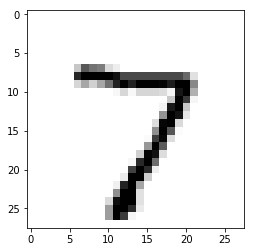

In [19]:
plt.imshow(img, cmap = plt.cm.Greys)

In [21]:
img.shape

(28, 28, 4)

In [23]:
import onnxruntime as ort

In [24]:
sess = ort.InferenceSession('/data/mnist/model.onnx', None)

In [60]:
in_name = sess.get_inputs()[0].name

In [59]:
out_name = sess.get_outputs()[0].name

In [28]:
# read in test data protobuf files included with the model
import onnx
from onnx import numpy_helper

In [36]:
tdata_idx = 1

In [37]:
tensor = onnx.TensorProto()
with open(os.path.join(f'/data/mnist/test_data_set_{tdata_idx}/input_0.pb'), 'rb') as f:
    tensor.ParseFromString(f.read())
input_data = numpy_helper.to_array(tensor)

In [38]:
input_data.shape

(1, 1, 28, 28)

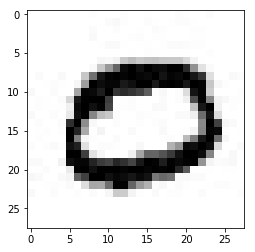

In [39]:
plt.imshow(input_data[0,0,:,:], cmap = plt.cm.Greys)

In [57]:
input_data.dtype

dtype('float32')

In [61]:
r = sess.run([out_name], {in_name : input_data})

In [66]:
int(np.argmax(np.array(r[0]).squeeze(), axis=0))

0

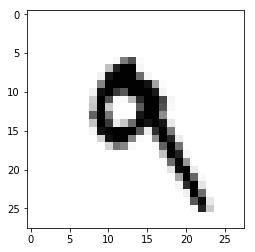

In [75]:
display_nth_image(7)

In [76]:
arr = np.array(test_images[7],dtype='float32').reshape(1,1,28,28)

In [77]:
r = sess.run([out_name], {in_name : arr})

In [78]:
int(np.argmax(np.array(r[0]).squeeze(), axis=0))

9